# Use NLP to do sentiment analysis on social media data

This project was conducted in the middle of the stress time of Ukraine war, hence I pulled the data on Reddit to see what they were talking and how they reacted with this war:
- Firstly, pulled the data from Reddit with topic is 'Ukraine'.
- Next, extract the sentiment scores of the titles of the posts.
- Plot a histogram of the sentiment scores
- Look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- Examine the text for some of the highest and lowest sentiment scores
- Finally, I write a short analysis of the results and the process. 

### Collect social data from Reddit, topic is 'ukraine'

In [10]:
import praw
import pandas as pd
import sqlite3
import pandas as pd
import credentialsChi

In [2]:
reddit = praw.Reddit(client_id=credentialsChi.client_id,
                     client_secret=credentialsChi.client_secret,
                     user_agent=credentialsChi.user_agent)

Version 7.6.1 of praw is outdated. Version 7.7.0 was released Saturday February 25, 2023.


In [3]:
ukr_subreddit = reddit.subreddit('ukraine').hot(limit=10)

In [4]:
for post in ukr_subreddit:
    print(post.title, post.score)

6:24 EET; The Sun is Rising Over Kyiv on the 380th Day of the Full-Scale Invasion. Today's post is the final entry in our series about Taras Shevchenko, who died on this day in 1861. 402
Good news. We almost done with DJI Mavic 3T. Need more $2308 and we will buy this drone for Ukrainian soldiers in Bakhmut. Hope for your help. All info in the comments. 696
For those who worry that standing up to Russia would just provoke Putin and drag the world into war - we only have to look at the history of the 20th century. Nothing is more provocative to a dictator than the weakness of free nations. 11121
Many explosions heard in Mariupol! 1033
Farewell ceremony for Hero of Ukraine Dmytro "Da Vinci" Kotsubailo commander of 1st Assult Battalion "Da Vinci's wolfs" 1760
On the night of March 10, 2023, partisans burned a combat aircraft near Vladivostok, russia 903
Finland's PM Sanna Marin in Kyiv today pays respects to Dmytro Kotsyubailo "da Vinci" who died fighting for Bakhmut 1207
The Wagner Group

In [5]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': [],
              'id': []}


ukr_subreddit = reddit.subreddit('ukraine').hot(limit=None)

for post in list(ukr_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)
    reddit_data['id'].append(post.id)

In [6]:
ukr_df = pd.DataFrame(reddit_data)
ukr_df

,title,link,author,n_comments,score,text,id
0,6:24 EET; The Sun is Rising Over Kyiv on the 3...,/r/ukraine/comments/11neqpy/624_eet_the_sun_is...,duellingislands,9,400,# 🇺🇦 Слава Україні! 🇺🇦\n\n\_\_\_\_\_\_\_\_\_\_...,11neqpy
1,Good news. We almost done with DJI Mavic 3T. N...,/r/ukraine/comments/11mraik/good_news_we_almos...,serhiiiam,23,700,,11mraik
2,For those who worry that standing up to Russia...,/r/ukraine/comments/11ngsfp/for_those_who_worr...,pastebluepaste,262,11121,,11ngsfp
3,Many explosions heard in Mariupol!,/r/ukraine/comments/11ns1zo/many_explosions_he...,Kubolomo,104,1043,,11ns1zo
4,"Farewell ceremony for Hero of Ukraine Dmytro ""...",/r/ukraine/comments/11nnc7m/farewell_ceremony_...,BananaBrumik,46,1761,,11nnc7m
...,...,...,...,...,...,...,...
807,It's Always Sunny in Crimea - You can support ...,/r/ukraine/comments/11h52jm/its_always_sunny_i...,Ukraine_Aid_Ops,5,182,,11h52jm
808,Destruction of the Russian Tor-M2 air defense ...,/r/ukraine/comments/11h15ce/destruction_of_the...,Kay51995,4,303,,11h15ce
809,Video of the downed Su-34.,/r/ukraine/comments/11h2en2/video_of_the_downe...,Geschichtsklitterung,22,257,,11h2en2
810,"Magyar update from Bakhmut - dated 2 March, po...",/r/ukraine/comments/11gxxmz/magyar_update_from...,RoninSolutions,47,483,,11gxxmz


In [7]:
# Collect comments
reddit_comments_data = {'author': [],
                        'score': [],
                        'text': [],
                        'post_id': []}
ukr_subreddit = reddit.subreddit('ukraine').hot(limit=10)

for post in list(ukr_subreddit):
    post.comments.replace_more(limit=None)
    for comment in post.comments:
        if comment.author is None:
            reddit_comments_data['author'].append('')
        else:
            reddit_comments_data['author'].append(comment.author.name)
        reddit_comments_data['score'].append(comment.score)
        reddit_comments_data['text'].append(comment.body)
        reddit_comments_data['post_id'].append(post.id)

In [8]:
comment_df = pd.DataFrame(reddit_comments_data)
comment_df

,author,score,text,post_id
0,AutoModerator,1,"\nПривіт u/duellingislands ! During wartime, t...",11neqpy
1,spsteve,17,"Unbelievable we are closing in on day 400, whe...",11neqpy
2,Jizzapherina,14,This is still so relevant today:\n\nKeep laugh...,11neqpy
3,sonicboomer46,13,I won't soon forget the inane russian propagan...,11neqpy
4,StevenStephen,7,There can be no wondering why he is so revered...,11neqpy
...,...,...,...,...
277,wunderfullynow,17,"This anthem is at once sad, hopeful, defiant a...",11nqsu8
278,freetimerva,11,My fuckin man singing in the trench hit me rig...,11nqsu8
279,Named_User-Name,10,Inspiring!\n\nRussia will never conquer these ...,11nqsu8
280,Rock-it-again,9,Fuck that choked me up pretty good.,11nqsu8


In [12]:
# Save data to SQLite3 database
ukr = sqlite3.connect("/Users/kienguyen/Documents/DATA SCIENCE/co_reddit.sqlite")
ukr_df.to_sql('posts', ukr, if_exists='replace', index=False)

812

In [13]:
ukr_df_check = pd.read_sql_query('SELECT * FROM posts;', ukr)
ukr.close()
ukr_df_check

,title,link,author,n_comments,score,text,id
0,6:24 EET; The Sun is Rising Over Kyiv on the 3...,/r/ukraine/comments/11neqpy/624_eet_the_sun_is...,duellingislands,9,400,# 🇺🇦 Слава Україні! 🇺🇦\n\n\_\_\_\_\_\_\_\_\_\_...,11neqpy
1,Good news. We almost done with DJI Mavic 3T. N...,/r/ukraine/comments/11mraik/good_news_we_almos...,serhiiiam,23,700,,11mraik
2,For those who worry that standing up to Russia...,/r/ukraine/comments/11ngsfp/for_those_who_worr...,pastebluepaste,262,11121,,11ngsfp
3,Many explosions heard in Mariupol!,/r/ukraine/comments/11ns1zo/many_explosions_he...,Kubolomo,104,1043,,11ns1zo
4,"Farewell ceremony for Hero of Ukraine Dmytro ""...",/r/ukraine/comments/11nnc7m/farewell_ceremony_...,BananaBrumik,46,1761,,11nnc7m
...,...,...,...,...,...,...,...
807,It's Always Sunny in Crimea - You can support ...,/r/ukraine/comments/11h52jm/its_always_sunny_i...,Ukraine_Aid_Ops,5,182,,11h52jm
808,Destruction of the Russian Tor-M2 air defense ...,/r/ukraine/comments/11h15ce/destruction_of_the...,Kay51995,4,303,,11h15ce
809,Video of the downed Su-34.,/r/ukraine/comments/11h2en2/video_of_the_downe...,Geschichtsklitterung,22,257,,11h2en2
810,"Magyar update from Bakhmut - dated 2 March, po...",/r/ukraine/comments/11gxxmz/magyar_update_from...,RoninSolutions,47,483,,11gxxmz


### Sentiment analysis

In [14]:
#Load data
con = sqlite3.connect('/Users/kienguyen/Documents/DATA SCIENCE/co_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df

,title,link,author,n_comments,score,text,id
0,6:24 EET; The Sun is Rising Over Kyiv on the 3...,/r/ukraine/comments/11neqpy/624_eet_the_sun_is...,duellingislands,9,400,# 🇺🇦 Слава Україні! 🇺🇦\n\n\_\_\_\_\_\_\_\_\_\_...,11neqpy
1,Good news. We almost done with DJI Mavic 3T. N...,/r/ukraine/comments/11mraik/good_news_we_almos...,serhiiiam,23,700,,11mraik
2,For those who worry that standing up to Russia...,/r/ukraine/comments/11ngsfp/for_those_who_worr...,pastebluepaste,262,11121,,11ngsfp
3,Many explosions heard in Mariupol!,/r/ukraine/comments/11ns1zo/many_explosions_he...,Kubolomo,104,1043,,11ns1zo
4,"Farewell ceremony for Hero of Ukraine Dmytro ""...",/r/ukraine/comments/11nnc7m/farewell_ceremony_...,BananaBrumik,46,1761,,11nnc7m
...,...,...,...,...,...,...,...
807,It's Always Sunny in Crimea - You can support ...,/r/ukraine/comments/11h52jm/its_always_sunny_i...,Ukraine_Aid_Ops,5,182,,11h52jm
808,Destruction of the Russian Tor-M2 air defense ...,/r/ukraine/comments/11h15ce/destruction_of_the...,Kay51995,4,303,,11h15ce
809,Video of the downed Su-34.,/r/ukraine/comments/11h2en2/video_of_the_downe...,Geschichtsklitterung,22,257,,11h2en2
810,"Magyar update from Bakhmut - dated 2 March, po...",/r/ukraine/comments/11gxxmz/magyar_update_from...,RoninSolutions,47,483,,11gxxmz


In [2]:
#extract the sentiment scores of the titles of the posts

In [15]:
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')

In [16]:
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [17]:
sentiment_dict = sentiment_df.to_dict()['score']

In [18]:
import numpy as np
# Keyword method
title_sentiments = []
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

In [19]:
df['keyword_sentiment'] = title_sentiments

In [20]:
df['keyword_sentiment']

0     -0.085714
1      0.156250
2     -0.177778
3      0.000000
4      0.111111
         ...   
807    0.095238
808   -0.181818
809    0.000000
810    0.000000
811    0.000000
Name: keyword_sentiment, Length: 812, dtype: float64

<AxesSubplot:ylabel='Frequency'>

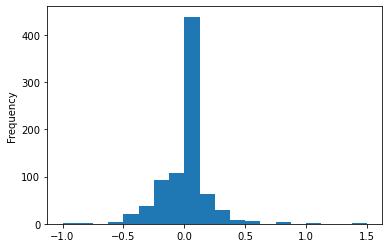

In [21]:
df['keyword_sentiment'].plot.hist(bins=20)

In [22]:
df['keyword_sentiment'].mean()

-0.014557730048440642

In [23]:
df['keyword_sentiment'].std()

0.18239390994780602

In [24]:
df['keyword_sentiment'].median()

0.0

In [13]:
#examine the text for some of the highest and lowest sentiment scores

In [25]:
df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
422,Defiance over Evil,-1.000000
119,Invaders destroy 400 apartment blocks in Mariu...,-0.769231
652,"NATO commander: Russia lost more than 200,000 ...",-0.615385
593,"Ukrainian military destroy enemy gun, MLRS on ...",-0.555556
535,Ukraine's Kostyuk dedicates first tennis title...,-0.555556
...,...,...
273,Happy International Women’s Day!,0.750000
75,Fight to Win 💛💙🇺🇦,0.750000
196,Ukraine’s most committed backer wins a huge el...,0.818182
419,Absolute Courage and Honor,1.000000


In [26]:
df.sort_values(by='keyword_sentiment')['title'].to_list()[:10]

['Defiance over Evil',
 'Invaders destroy 400 apartment blocks in Mariupol to hide war crimes – Mayor',
 'NATO commander: Russia lost more than 200,000 killed and wounded in the war',
 'Ukrainian military destroy enemy gun, MLRS on Kinburn Spit',
 "Ukraine's Kostyuk dedicates first tennis title to war victims",
 'Negative one more kornet.',
 'Ukraine: How the war is making soil and water toxic',
 "Russia's invasion of Ukraine: Making the perpetrators pay",
 'Ukrainian victims of war with Russia deserve justice, Garland says',
 'Day 375 - The Destruction in This War is Beyond Understanding - War in Ukraine']

In [27]:
df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:10]

['Nice throw',
 'Absolute Courage and Honor',
 'Ukraine’s most committed backer wins a huge election victory in Estonia',
 'Fight to Win 💛💙🇺🇦',
 'Happy International Women’s Day!',
 'Russian engineering at its finest',
 'Fight to win 💛💙🇺🇦 Taras Shevchenko',
 'Ukrainian Rights Group Truth Hounds Wins Norwegian Prize',
 'I-134 form help (family)',
 'Solar panels to donate']

In [29]:
#TextBlob method
from textblob import TextBlob

In [30]:
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

df['tb_sentiment'] = df['title'].apply(get_tb_sentiment)

<AxesSubplot:ylabel='Frequency'>

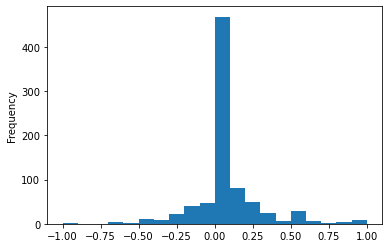

In [31]:
df['tb_sentiment'].plot.hist(bins=20)

In [32]:
df['tb_sentiment'].mean()

0.05859302194623933

In [33]:
df['tb_sentiment'].std()

0.21300704107920854

In [34]:
df['tb_sentiment'].median()

0.0

In [25]:
#VADER method

In [35]:
import nltk
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kienguyen/nltk_data...


In [36]:
analyzer = SentimentIntensityAnalyzer()
df['vd_sentiment'] = df['title'].apply(lambda title: analyzer.polarity_scores(title))
df.head()

,title,link,author,n_comments,score,text,id,keyword_sentiment,tb_sentiment,vd_sentiment
0,6:24 EET; The Sun is Rising Over Kyiv on the 3...,/r/ukraine/comments/11neqpy/624_eet_the_sun_is...,duellingislands,9,400,# 🇺🇦 Слава Україні! 🇺🇦\n\n\_\_\_\_\_\_\_\_\_\_...,11neqpy,-0.085714,0.000,"{'neg': 0.096, 'neu': 0.904, 'pos': 0.0, 'comp..."
1,Good news. We almost done with DJI Mavic 3T. N...,/r/ukraine/comments/11mraik/good_news_we_almos...,serhiiiam,23,700,,11mraik,0.156250,0.600,"{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'comp..."
2,For those who worry that standing up to Russia...,/r/ukraine/comments/11ngsfp/for_those_who_worr...,pastebluepaste,262,11121,,11ngsfp,-0.177778,0.160,"{'neg': 0.251, 'neu': 0.69, 'pos': 0.058, 'com..."
3,Many explosions heard in Mariupol!,/r/ukraine/comments/11ns1zo/many_explosions_he...,Kubolomo,104,1043,,11ns1zo,0.000000,0.625,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,"Farewell ceremony for Hero of Ukraine Dmytro ""...",/r/ukraine/comments/11nnc7m/farewell_ceremony_...,BananaBrumik,46,1761,,11nnc7m,0.111111,0.000,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp..."


In [37]:
df['vd_compound'] = df['vd_sentiment'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.vd_compound>0,'sentiment_type']='POSITIVE'
df.loc[df.vd_compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.vd_compound<0,'sentiment_type']='NEGATIVE'

<AxesSubplot:title={'center':'sentiment analysis'}>

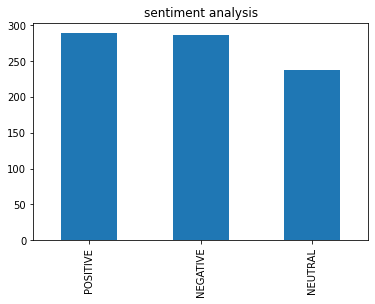

In [38]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

<AxesSubplot:ylabel='Frequency'>

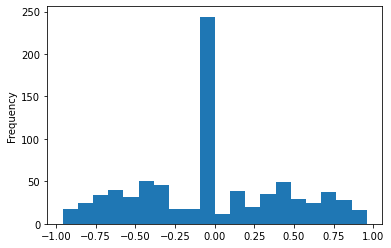

In [39]:
df['vd_compound'].plot.hist(bins=20)

In [43]:
df['vd_compound'].mean()

-0.011711330049261094

In [41]:
df['vd_compound'].std()

0.46201720076734004

In [42]:
df['vd_compound'].median()

0.0

# Summary

Firstly, I tried to extract the sentiment scores of the titles of the posts by using keyword method, and the scores are mainly around 0, however the average score is -0.015. Next, I tried more with Textblob and Vader to check the sentiment scores between these methods. It's  different among these 3 methods, the Textblob method gives us a positive average scores, while the other two resulted in negative mean scores, the Vader method and Keyword socres are almost -0.012 vs -0.02. However, the standard deviation is nearly the same between Keyword and Textblob methods, around 0.2.

In general, the content about "Ukraine" on Reddit seems negative according to the Keyword and Vader methods.

According to the Keyword method, the content of the posts having highest sentiment score is mostly to encourage Ukraine and the posts having lowest scores is mostly to against the war.

In my opinion, these findings can help journalists or communication companies understand about the people who care about the status of Ukraine to write and issue articles with proper topics and words.